### This is the notebook for creating tests and performing them.

Format of the paths : p = [(x,y),...]

1st : simple, and then more complex.
Easiest : same number of points in both paths. No crossing. No going back. On segment. Same position at the beginning. Same position at the arrival.

In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import unittest

import solution as sl ## the solution notebook exported as a script

In [2]:
# Function which displays the paths

def displ(theo,expe):
    # theo is the theoretical path
    # expe is the one really performed
    plt.clf()
    plt.figure()
    plt.plot([theo[i][0] for i in range(len(theo))],[theo[i][1] for i in range(len(theo))],c='r',label = "theoretical")
    #plt.tit("theoretical")
    plt.plot([expe[i][0] for i in range(len(expe))],[expe[i][1] for i in range(len(expe))],c='g',label = "experimental")
    #plt.label("experimental")
    plt.title("Paths")
    plt.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

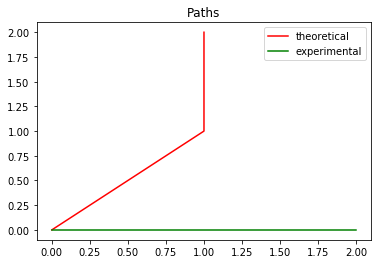

In [3]:
# Test of the function displ.

theo = [(0,0),(1,1),(1,2)]
expe = [(0,0),(1,0),(2,0)]

displ(theo,expe)

In [4]:
# Oracle tests
# Oracles are found on https://github.com/rouvoy/indoor-location-oracles

def oracleParser(filepath):
    """
    Text parser reading the oracle files and converting it's content to lists of tuples
    
    arg1: filepath. A string, the path to the file containing the oracle test to read.
    return: theoreticalPath. A list of tuples, the coordiantes of the theretical path.
            experimentalPath. A list of tuples, the coordiantes of the experimental path.
            expectedResult. An int or a float, the expected result computed by trajectoryError().
            error. An int or a float, the error allowed on the computation.
    """
    # define results:
    theoreticalPath = []
    experimentalPath = []
    # fetch the file
    oracle = open(filepath,mode='r')
    # extract data
    theoreticalXAxis = oracle.readline()
    theoreticalYAxis = oracle.readline()
    experimentalXAxis = oracle.readline()
    experimentalYAxis = oracle.readline()
    expectedResult = oracle.readline()
    error = oracle.readline()
    # process the strings
    theoreticalXAxis = [int(x) for x in theoreticalXAxis.split(",")]
    theoreticalYAxis = [int(x) for x in theoreticalYAxis.split(",")]
    for i in range(len(theoreticalXAxis)):
        theoreticalPath.append((theoreticalXAxis[i],theoreticalYAxis[i]))
    for i in range(len(experimentalXAxis)):
        experimentalPath.append((experimentalXAxis[i],experimentalYAxis[i]))
    expectedResult = parseNumeral(expectedResult)
    error = parseNumeral(error)
    # returns
    return theoreticalPath, experimentalPath, expectedResult, error
    
def parseNumeral(strValue):
    """
    Transforms a string value to the appropriate numeral type.
    
    arg1: strValue. A string, a numerical value.
    return: An int or a float, The value.
    """
    #try:
    #    return int(strValue)
    #except ValueError:
    return float(strValue)
    
def performOracleTest(oracleFile):
    """
    Perform oracle test
    
    arg1: oracleFile. A string, the filepath to the oracle.
    """
    
    # step 1: read the oracle and extract its data:
    theoreticalPath, experimentalPath, expectedResult, error = oracleParser(oracleFile)
    
    # step 2: compute the error on the trajectory:
    myResults = sl.trajectoryError(theoreticalPath, experimentalPath)
    
    # step 3: compare test results:
    if myResults in range(expectedResult-error, expectedResult+error):
        ## test successfull
        print("Success")
    else:
        ## test failed
        print("Failure")
    # display
    displ(theo,expe)

In [5]:
#performOracleTest("./indoor-location-oracles/Oracles/[test0]simple.txt")

__Unit testing using the unittest.py module__

In [6]:
class TestTrajectoryError(unittest.TestCase):
    """
    Unit testing code for the trajectoryError brick. Each test case represent a scenario
    with its unique theoretical and experimental trajectories.
    """

    def test_equalPaths(self): # -> Test 1
        theo = [(0,x) for x in range(5)]
        expe = [(0,x) for x in range(5)]
        #displ(theo,expe)
        
        self.assertEqual(0, sl.trajectoryError(theo, expe))# Difference expected : 0
    
    def test_equalPathsWithUTurn(self): # -> Test 2
        theo = [(0,2),(1,2),(1,0),(0,0)]
        expe = [(0,2),(1,2),(1,0),(0,0)]
        #displ(theo,expe)
        
        self.assertEqual(0, sl.trajectoryError(theo, expe))# Difference expected : 0
        
    def test_straightParallel(self): # -> Test 3
        theo = [(0,x) for x in range(5)]
        expe = [(1,x) for x in range(5)]
        #displ(theo,expe)
        
        self.assertEqual(1, sl.trajectoryError(theo, expe))# Difference expected : (area = 4 )/ (length = 4) = 1

    def test_straightCrossing(self): # -> Test 4
        theo = [(0,0),(0,1)]
        expe = [(1,0),(-1,1)]
        #displ(theo,expe)
        
        self.assertEqual(0.5, sl.trajectoryError(theo, expe))# Difference expected : 0.5
        
    def test_differentLength(self): # -> Test 5
        theo = [(0,0),(5,0)]
        expe = [(0,0)] + [(x,1) for x in range(6)] + [(5,0)]
        #displ(theo,expe)
        
        self.assertEqual(1, sl.trajectoryError(theo, expe))# Difference expected : 1

    def test_differentLengthCrossing(self): # -> Test 6
        theo = [(0,0),(0,2)]
        expe = [(0,0),(1,0),(-1,1),(1,2),(0,2)]
        #displ(theo,expe)
        
        self.assertEqual(0.75, sl.trajectoryError(theo, expe))# Difference expected : 0.75
        
    # Test 7 : when starting point and last point are the same
    
    def test_startEqualsLastInTheo(self):
        pass
    
    # Test 8 : 2 crossings
    
    def test_twoCrossings(self):
        pass    
    
    # Test 9 : crossing with UTurn
    
    def test_crossingWithUturn(self):
        pass


In [7]:
class TestPathLength(unittest.TestCase):
    """
    Unit testing code for the path length measurement bricks. This test both the seg_length() and apth_length() functions.
    """
##    def test_typeErrorSegment(self):
##        with self.assertRaises(TypeError):
##            seg_length('a',(0,0))
##        
##    def test_typeErrorPath(self):
##        with self.assertRaises(TypeError):
##            path_length('a',(0,0))
        
    def test_simplestSegment(self):
        a = (0,0)
        b = (1,0)
        
        self.assertEqual(1, sl.seg_length(a,b))# expected 1
        
    def test_simplestSegmentInverted(self):
        a = (0,0)
        b = (1,0)
        
        self.assertEqual(1, sl.seg_length(b,a))# expected 1
        
    def test_simplestPath(self):
        path = [(0,0),(0,1),(1,1)]
        
        self.assertEqual(2, sl.path_length(path))# expected 2
        
    def test_simplestPathInverted(self):
        invPath = [(0,0),(0,-1),(-1,-1)]
        
        self.assertEqual(2, sl.path_length(invPath))# expected 2
        

In [8]:
class TestIntersection(unittest.TestCase):
    """
    Unit testing code for the intersection locator brick.
    """

    def test_simplestIntersection(self):
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (2,0)
        segB_2 = (0,2)
        
        self.assertEqual((1.0,1.0), sl.intersection(segA_1, segA_2, segB_1, segB_2))# expected (1,1)
        
    def test_noIntersection(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        segB_1 = (1,0)
        segB_2 = (1,1)
        
        self.assertEqual(None, sl.intersection(segA_1, segA_2, segB_1, segB_2))# expected None
        
    def test_commonPoint(self):
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (0,0)
        segB_2 = (0,-1)
        
        self.assertEqual((0.0,0.0), sl.intersection(segA_1, segA_2, segB_1, segB_2))# expected (0,0)
        
    def test_permutationOrderOne(self):
         ## same segemnts as test_simplestIntersection but given in a different order
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (2,0)
        segB_2 = (0,2)
        
        self.assertEqual((1.0,1.0), sl.intersection(segA_2, segA_1, segB_1, segB_2))# expected (1,1)
        
    def test_permutationOrderTwo(self):
         ## same segemnts as test_simplestIntersection but given in a different order
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (2,0)
        segB_2 = (0,2)
        
        self.assertEqual((1.0,1.0), sl.intersection(segA_1, segA_2, segB_2, segB_1))# expected (1,1)
        
    def test_permutationOrderThree(self):
         ## same segemnts as test_simplestIntersection but given in a different order
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (2,0)
        segB_2 = (0,2)
        
        self.assertEqual((1.0,1.0), sl.intersection(segB_1, segB_2, segA_1, segA_2))# expected (1,1)



In [9]:
class TestOrthoProjection(unittest.TestCase):
    """
    Unit testing code for the orthogonal projection brick.
    """
    
    def test_projectionNotInSegment(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (-1,-1)
        
        self.assertEqual(None, sl.ortogonalProjection(segA_1, segA_2, y))# expected (0,1)

    def test_projectionOnVerticalLineFromRight(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (1,1)
        
        self.assertEqual((0,1), sl.ortogonalProjection(segA_1, segA_2, y))# expected (0,1)
        
    def test_projectionOnVerticalLineFromLeft(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (-1,1)
        
        self.assertEqual((0,1), sl.ortogonalProjection(segA_1, segA_2, y))# expected (0,1)
        
    def test_projectionOnHorizontalLineFromAbove(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        y = (1,1)
        
        self.assertEqual((1,0), sl.ortogonalProjection(segA_1, segA_2, y))# expected (1,0)
    
    def test_projectionOnHorizontalLineFromBelow(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        y = (1,-1)
        
        self.assertEqual((1,0), sl.ortogonalProjection(segA_1, segA_2, y))# expected (1,0)
    
    def test_alreadyInSegment(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (0,1)
        
        self.assertEqual((0,1), sl.ortogonalProjection(segA_1, segA_2, y))# expected (0,1)
        
    def test_verticallyAlignedAboveSegment(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        y = (0,2)
        
        self.assertEqual((0,1), sl.ortogonalProjection(segA_1, segA_2, y))
        # Doesn't work : keeps its ordinate even if it is not in the segment.
        
    def test_verticallyAlignedUnderSegment(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        y = (0,-1)
        
        self.assertEqual((0,1), sl.ortogonalProjection(segA_1, segA_2, y))
    
    def test_diagonallyAlignedAboveSegment(self):
        segA_1 = (0,0)
        segA_2 = (1,1)
        y = (2,2)
        
        self.assertEqual((1,1), sl.ortogonalProjection(segA_1, segA_2, y))

In [10]:
class TestComputeArea(unittest.TestCase):
    """
    Unit testing code for the area computation brick in the case of a trapezium.
    """

    def test_identicalSegments(self):
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (0,0)
        segB_2 = (2,2)
        
        self.assertEqual(0, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
        
    def test_square(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        segB_1 = (1,1)
        segB_2 = (1,0)
        
        self.assertEqual(1, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
    
    def test_triangle(self):
        # This is not a triangle !! This test makes no sense.
        # Your way of computing the area of the quadrilateral doesn't make much sense here... Draw it !
        # Raises error of singular matrix in orthoProjection but can't find when and why...
        segA_1 = (0,0)
        segA_2 = (0,2)
        segB_1 = (2,2)
        segB_2 = (1,1)
        
        self.assertEqual(2, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
    
    def test_trapeziumSimplest(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        segB_1 = (1,1)
        segB_2 = (2,0)
        
        self.assertEqual(1.5, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
        
    def test_trapeziumNegative(self):
        segA_1 = (0,0)
        segA_2 = (0,-1)
        segB_1 = (-1,-1)
        segB_2 = (-2,0)
        
        self.assertEqual(1.5, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
        
    def test_trapeziumNegativePositive(self):
        segA_1 = (-1,-1)
        segA_2 = (-1,1)
        segB_1 = (1,1)
        segB_2 = (2,-1)
        
        self.assertEqual(5, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
        
    def test_oneOptusAngle(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        segB_1 = (-1,1)
        segB_2 = (2,1)
        
        self.assertEqual(2.5, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
    
    def test_anotherOptusAngle(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        segB_1 = (0,1)
        segB_2 = (3,1)
        
        self.assertEqual(2.5, sl.computeArea(segA_1, segA_2, segB_1, segB_2))
    
    def test_twoOptusAngles(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        segB_1 = (-1,1)
        segB_2 = (3,1)
        
        self.assertEqual(3, sl.computeArea(segA_1, segA_2, segB_1, segB_2))

In [11]:
class TestAreaRightTriangle(unittest.TestCase):
    """
    Unit testing for the area computation brick in the case of a right triangle
    """
    def test_flatTriangle(self):
        base = 0
        height = 3
        
        self.assertEqual(0,sl.areaRightTriangle(base,height))
    
    def test_otherFlatTriangle(self):
        base = 3
        height = 0
        
        self.assertEqual(0,sl.areaRightTriangle(base,height))
    
    def test_normalTriangle(self):
        base = 3
        height = 5
        
        self.assertEqual(7.5,sl.areaRightTriangle(base,height))
    
    def test_negativeDistance(self):
        base = -3
        height = 5
        
        self.assertEqual(7.5,sl.areaRightTriangle(base,height))
        
    def test_otherNegativeDistance(self):
        base = 3
        height = -5
        
        self.assertEqual(7.5,sl.areaRightTriangle(base,height))

In [12]:
class TestBelongsToSegment(unittest.TestCase):
    """
    Unit testing for the boolean checker if a point belongs to a segent
    """
    def test_simplest(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,1)
        
        self.assertTrue(sl.pointBelongsToSegment(seg_A, seg_B, point))
    
    def test_insideBelow(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,0.5)
        
        self.assertFalse(sl.pointBelongsToSegment(seg_A, seg_B, point))
        
    def test_insideAbove(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,1.5)
        
        self.assertFalse(sl.pointBelongsToSegment(seg_A, seg_B, point))
        
    def test_left(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (-1,1)
        
        self.assertFalse(sl.pointBelongsToSegment(seg_A, seg_B, point))
        
    def test_right(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (4,1)
        
        self.assertFalse(sl.pointBelongsToSegment(seg_A, seg_B, point))
        
    def test_above(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,4)
        
        self.assertFalse(sl.pointBelongsToSegment(seg_A, seg_B, point))
        
    def test_below(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,-2)
        
        self.assertFalse(sl.pointBelongsToSegment(seg_A, seg_B, point))

__unittest:__ TestSuite 

In [14]:
# initialisation
loader = unittest.TestLoader()
myTestSuite = unittest.TestSuite()
# add tests
myTestSuite.addTests(loader.loadTestsFromTestCase(TestPathLength))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestBelongsToSegment))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestOrthoProjection))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestIntersection))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestComputeArea))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestAreaRightTriangle))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestTrajectoryError))
# run!
runner = unittest.TextTestRunner()
runner.run(myTestSuite)

............EF....FF......F.FFFFFEF......FF...FF.
ERROR: test_diagonallyAlignedAboveSegment (__main__.TestOrthoProjection)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-9-f23fac124b03>", line 68, in test_diagonallyAlignedAboveSegment
    self.assertEqual((1,1), sl.ortogonalProjection(segA_1, segA_2, y))
  File "C:\Users\Zotto\Documents\_Scuola\DataSci\M1-S1\RefresherCS\CSRefresh_Project\solution.py", line 197, in ortogonalProjection
    point = np.dot(lin.inv(mat), np.array([-b,-c]))
  File "C:\Users\Zotto\Anaconda3\lib\site-packages\numpy\linalg\linalg.py", line 551, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "C:\Users\Zotto\Anaconda3\lib\site-packages\numpy\linalg\linalg.py", line 97, in _raise_linalgerror_singular
    raise LinAlgError("Singular matrix")
numpy.linalg.LinAlgError: Singular matrix

ERROR: test_triangle (__main__.TestComputeArea)
-------------------

<unittest.runner.TextTestResult run=49 errors=2 failures=14>